## Financial Risk Analysis in Python - Apple and S&P 500

**The scenario:**

ABC company is about to buy shares in Apple and S&P500 with the target to obtain optimum profit in the space of two years. But they are curious how the two companies have been performing for the past three years. 

So, the manager approaches you as the Data Analyst in the ABC company; please can we know how the Apple and S&P 500 stock market have been for the past three years? We would like to know if the risk is minimal or unaffordable for us. 

This is a real scenario!

In python, we can use libraries such as pandas for data manipulation, yfinance for fetching historical stock prices, and matplotlib for visualization. For more advanced financial analysis, we can use numpy for mathematical operationsand pyfolio for performance analysis.

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pyfolio
import warnings
warnings.filterwarnings('ignore')

/home/johnadi/Desktop/projects-from-yt-channel-damsk_analytics/financial-risk-analysis-project/env/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
symbol = "AAPL"
start_date = '2020-01-01'
end_date = '2023-12-31'
data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200


In [4]:
data['Returns'] = data['Adj Close'].pct_change()
data.head()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400,NaN
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800,-0.009722
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200,0.007968
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000,-0.004703
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200,0.016086


In [5]:
volatility = np.std(data['Returns'])
volatility

0.021135398878505265

In [6]:
market_data = yf.download("^GSPC", start=start_date, end=end_date)
data = data.join(market_data['Adj Close'], on=data.index, rsuffix="_Market")
data['Returns_Market'] = data['Adj Close_Market'].pct_change()
data

[*********************100%%**********************]  1 of 1 completed


,key_0,Open,High,Low,Close,Adj Close,Volume,Returns,Adj Close_Market,Returns_Market
Date,,,,,,,,,,
2020-01-02,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400,NaN,3257.850098,NaN
2020-01-03,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800,-0.009722,3234.850098,-0.007060
2020-01-06,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200,0.007968,3246.280029,0.003533
2020-01-07,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000,-0.004703,3237.179932,-0.002803
2020-01-08,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200,0.016086,3253.050049,0.004902
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800,-0.005547,4754.629883,0.001660
2023-12-26,2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300,-0.002841,4774.750000,0.004232
2023-12-27,2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700,0.000518,4781.580078,0.001430


In [7]:
cov_matrix = np.cov(data['Returns'].dropna(), data["Returns_Market"].dropna())
beta = cov_matrix[0,1]/cov_matrix[1,1]

beta

1.1896768749015953

In [8]:
# sharpe ratio
sharpe_ratio = data['Returns'].mean()/volatility

sharpe_ratio

0.056141230585988494

Data Visualization

In [9]:
data['Week_Returns'] = data['Returns'].rolling(7).mean()
data['Month_Returns'] = data['Returns'].rolling(30).mean()

data.head()

,key_0,Open,High,Low,Close,Adj Close,Volume,Returns,Adj Close_Market,Returns_Market,Week_Returns,Month_Returns
Date,,,,,,,,,,,,
2020-01-02,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.059418,135480400,NaN,3257.850098,NaN,NaN,NaN
2020-01-03,2020-01-03,74.287498,75.144997,74.125000,74.357498,72.349129,146322800,-0.009722,3234.850098,-0.007060,NaN,NaN
2020-01-06,2020-01-06,73.447502,74.989998,73.187500,74.949997,72.925636,118387200,0.007968,3246.280029,0.003533,NaN,NaN
2020-01-07,2020-01-07,74.959999,75.224998,74.370003,74.597504,72.582649,108872000,-0.004703,3237.179932,-0.002803,NaN,NaN
2020-01-08,2020-01-08,74.290001,76.110001,74.290001,75.797501,73.750237,132079200,0.016086,3253.050049,0.004902,NaN,NaN


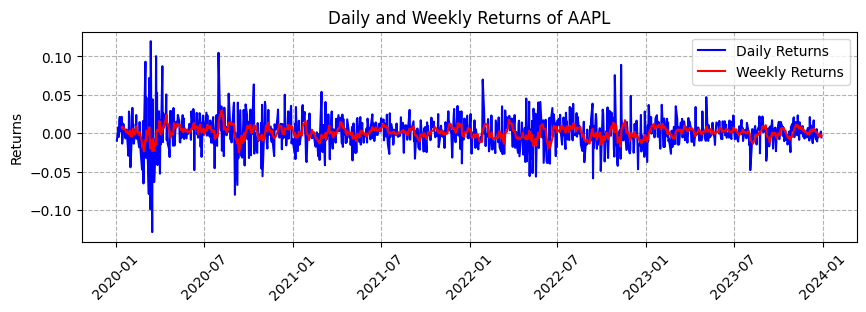

In [10]:
# Step 6: Visualization
plt.figure(figsize=(10,6))

# Plotting returns
plt.subplot(2, 1, 1)
plt.plot(data.index, data['Returns'], label='Daily Returns', color='Blue')
plt.plot(data.index, data['Week_Returns'], label='Weekly Returns', color='red')
plt.title('Daily and Weekly Returns of {}'.format(symbol))
plt.ylabel('Returns')
plt.grid(linestyle='--')
plt.xticks(rotation=45)
plt.legend()

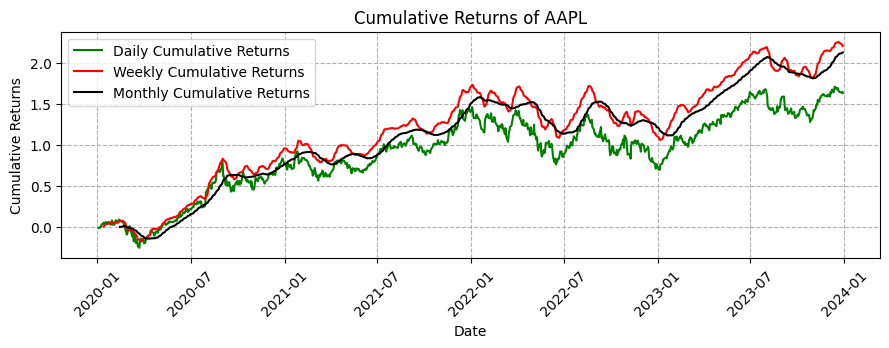

In [11]:
# Plotting cumulative returns
plt.figure(figsize=(9,6))
plt.subplot(2, 1, 2)
cumulative_returns = (1 + data['Returns']).cumprod()-1
cumulative_returns_w = (1 + data['Week_Returns']).cumprod()-1
cumulative_returns_m = (1 + data['Month_Returns']).cumprod()-1
plt.plot(data.index, cumulative_returns, label='Daily Cumulative Returns', color='green')
plt.plot(data.index, cumulative_returns_w, label='Weekly Cumulative Returns', color='red')
plt.plot(data.index, cumulative_returns_m, label='Monthly Cumulative Returns', color='black')
plt.title('Cumulative Returns of {}'.format(symbol))
plt.xlabel('Date')
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Further parameters

In [12]:
# Calculate VaR
VaR = np.percentile(data['Returns'].dropna(),5)

# Calculate Alpha
model = np.polyfit(data['Returns_Market'].dropna(), data['Returns'].dropna(),1)
alpha = model[1]

# Calculate Treynor ratio
risk_free_rate = 0.02 # Assume a risk free rate
treynor_ratio = (data['Returns'].mean() - risk_free_rate) / beta

# Calculate maximum Drawdown
cumulative_returns = (1 + data['Returns']).cumprod()
peak = cumulative_returns.cummax()
drawdown = (cumulative_returns - peak)/peak
max_drawdown = abs(drawdown.min())

# Print results
print("Volatility:", volatility)
print("Beta:", beta)
print("Sharpe Ratio:", sharpe_ratio)
# Print additional results
print("VaR at 95% confidence Level:", VaR)
print("Alpha:", alpha)
print("Treynor Ratio:", treynor_ratio)
print("Maximum Drawdown:", max_drawdown)

Volatility: 0.021135398878505265
Beta: 1.1896768749015953
Sharpe Ratio: 0.056141230585988494
VaR at 95% confidence Level: -0.03240541283744729
Alpha: 0.0006095820642973628
Treynor Ratio: -0.015813901316347898
Maximum Drawdown: 0.3142725267692721


#### Summary:

This project fetches historical stock prices for Apple (AAPL) and the S & P 500 (^GSPC) using yfinance, calculates daily returns, and then computes volatility, beta and the Sharpe ratio etc. Finally, it visualizes the daily returns and cumulative returns.